# <span style="color:red"> Problem: Dataset of one feature and one output is given. Predict the line that best fit the dataset.</span>

# <span style="color:red">Dataset preparation</span>

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.arange(-100, 100, dtype=torch.float32)

In [3]:
y = 5*x + 1

In [4]:
noise = torch.rand(y.shape, dtype=torch.float32)*10
y = y + noise

In [5]:
x = x.view(x.shape[0], -1)

In [6]:
y = y.view(y.shape[0], -1)

In [7]:
DS = {'X': x, 'Y': y}

### Description of some keyworks:
```
DS: dictionary of provided dataset x, y. DS['X'] is x, DS['Y'] is y.
LOSS: list of losses in epochs
```

# <span style="color:green"> Answer: </span>

## Custom dataset

In [8]:
from torch.utils.data.dataset import Dataset

class MyCustomDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x) # of how many examples(images?) you have

In [9]:
dataset = MyCustomDataset(DS['X'], DS['Y'])

## DataLoader

In [10]:
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(dataset, batch_size, shuffle=True)

# Model

In [11]:
class linear_regression(torch.nn.Module):
    
    def __init__(self, input_size, output_size):
        
        super(linear_regression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        
        out = self.linear(x)
        return out

In [12]:
model = linear_regression(1, 1)

# Loss

In [13]:
criterion = torch.nn.MSELoss() 

# Optimizer

In [14]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.0000001)

In [15]:
with torch.no_grad():
    y_pred = model(DS['X'])

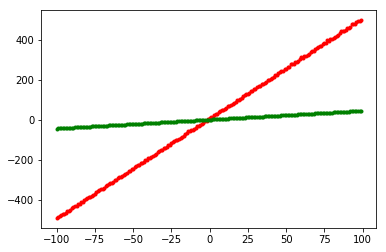

In [16]:
plt.plot(DS['X'].view(-1).numpy(), DS['Y'].view(-1).numpy(), 'r.')
plt.plot(DS['X'].view(-1).numpy(), y_pred.view(-1).numpy(), 'g.')

In [17]:
LOSS = []
for epoch in range(800):
    sum_loss_in_batch = 0.
    for step, (x, y) in enumerate(train_loader):
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_loss_in_batch += loss.item()
    
    loss_in_epoch = sum_loss_in_batch/batch_size
    
    print(f"Epoch {epoch} loss: {loss_in_epoch}")
    
    LOSS.append(loss_in_epoch)

Epoch 0 loss: 15028.544555664062
Epoch 1 loss: 14165.007446289062
Epoch 2 loss: 15005.786987304688
Epoch 3 loss: 14314.609985351562
Epoch 4 loss: 14296.348022460938
Epoch 5 loss: 14830.9150390625
Epoch 6 loss: 14275.133544921875
Epoch 7 loss: 13930.027709960938
Epoch 8 loss: 14123.751098632812
Epoch 9 loss: 13783.195068359375
Epoch 10 loss: 14543.126708984375
Epoch 11 loss: 13939.632568359375
Epoch 12 loss: 12982.7685546875
Epoch 13 loss: 13317.461791992188
Epoch 14 loss: 12386.501770019531
Epoch 15 loss: 13983.994262695312
Epoch 16 loss: 12940.669555664062
Epoch 17 loss: 12211.003051757812
Epoch 18 loss: 12976.8046875
Epoch 19 loss: 12607.204467773438
Epoch 20 loss: 11977.124389648438
Epoch 21 loss: 12943.833740234375
Epoch 22 loss: 11993.450317382812
Epoch 23 loss: 11994.9404296875
Epoch 24 loss: 11627.855102539062
Epoch 25 loss: 11173.451965332031
Epoch 26 loss: 12302.27197265625
Epoch 27 loss: 11916.969848632812
Epoch 28 loss: 11529.8779296875
Epoch 29 loss: 11908.193115234375
Epoc

Epoch 261 loss: 1346.8321685791016
Epoch 262 loss: 1259.7169876098633
Epoch 263 loss: 1357.4365997314453
Epoch 264 loss: 1189.5609397888184
Epoch 265 loss: 1202.5162734985352
Epoch 266 loss: 1305.8819427490234
Epoch 267 loss: 1257.6188049316406
Epoch 268 loss: 1209.083023071289
Epoch 269 loss: 1231.6671752929688
Epoch 270 loss: 1246.8771667480469
Epoch 271 loss: 1248.0557098388672
Epoch 272 loss: 1242.4781951904297
Epoch 273 loss: 1180.5885314941406
Epoch 274 loss: 1156.7525024414062
Epoch 275 loss: 1141.0459289550781
Epoch 276 loss: 1186.9925842285156
Epoch 277 loss: 1153.9731140136719
Epoch 278 loss: 1131.0439224243164
Epoch 279 loss: 1058.1749420166016
Epoch 280 loss: 1121.0825805664062
Epoch 281 loss: 1050.5028076171875
Epoch 282 loss: 1115.4442749023438
Epoch 283 loss: 1100.7366027832031
Epoch 284 loss: 1076.3970794677734
Epoch 285 loss: 1099.9351959228516
Epoch 286 loss: 1016.5727767944336
Epoch 287 loss: 963.4180603027344
Epoch 288 loss: 1026.0018005371094
Epoch 289 loss: 1017.8

Epoch 534 loss: 113.86556720733643
Epoch 535 loss: 107.3985767364502
Epoch 536 loss: 119.21356105804443
Epoch 537 loss: 106.37475109100342
Epoch 538 loss: 108.0176477432251
Epoch 539 loss: 109.5231466293335
Epoch 540 loss: 107.82333183288574
Epoch 541 loss: 100.41484117507935
Epoch 542 loss: 107.50056171417236
Epoch 543 loss: 97.3059892654419
Epoch 544 loss: 104.27337741851807
Epoch 545 loss: 106.42207431793213
Epoch 546 loss: 106.5546703338623
Epoch 547 loss: 97.83943557739258
Epoch 548 loss: 97.14677429199219
Epoch 549 loss: 103.57703590393066
Epoch 550 loss: 101.1270055770874
Epoch 551 loss: 98.29807758331299
Epoch 552 loss: 91.4837327003479
Epoch 553 loss: 96.08602714538574
Epoch 554 loss: 90.66557121276855
Epoch 555 loss: 93.93566226959229
Epoch 556 loss: 89.34431505203247
Epoch 557 loss: 93.63912868499756
Epoch 558 loss: 90.18389987945557
Epoch 559 loss: 91.77290058135986
Epoch 560 loss: 87.30098533630371
Epoch 561 loss: 85.53788185119629
Epoch 562 loss: 97.29007720947266
Epoch 5

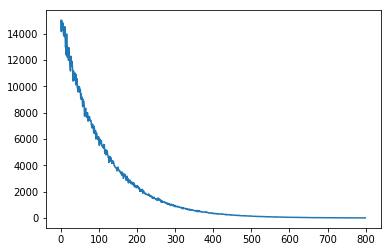

In [18]:
import matplotlib.pyplot as plt
plt.plot(LOSS)

In [19]:
with torch.no_grad():
    y_pred = model(DS['X'])

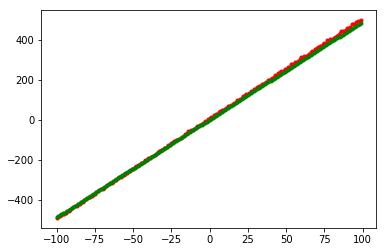

In [20]:
plt.plot(DS['X'].view(-1).numpy(), DS['Y'].view(-1).numpy(), 'r.')
plt.plot(DS['X'].view(-1).numpy(), y_pred.view(-1).numpy(), 'g.')